## **TASK-1 PREDICTION OF STUDENT'S SCORES USING SUPERVISED ML**

**AUTHOR- Vanshul Gupta**

This task is part of the internship with The Sparks Foundation. I have been tasked to predict the percentage of marks scored by the students based on the number of study hours.

I will be performing the following steps:

-
Data reading and understanding

-Exploratory Data Analysis

-Building a Simple Regression Model

-Model Evaluation and Prediction

In [2]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
%matplotlib inline

**Reading the data from source**

In [3]:
#Loading data
data=pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
# Check if there any null value in the Dataset
data.isnull == True

False

In [7]:

data.shape

(25, 2)

**DATA EXPLORATION**

In [8]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**VISUALIZATION OF DATA**

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data.We can create the plot with the following script

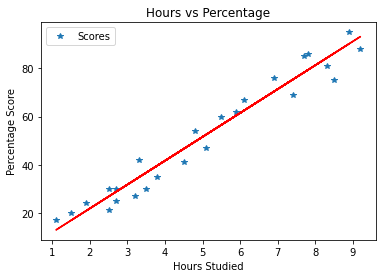

In [24]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.plot(X, line,color='red'); 
plt.show()


From the graph we can safely assume a positive linear relation between the number of hours studied and percentage of score

# **Data Preprocessing**

This step involved division of data into "attributes" (inputs) and "labels" (outputs).

In [13]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# **Model Training**
Splitting the data into training and testing sets, and training the algorithm.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
regressor = LinearRegression()  
regressor.fit(X_train.reshape(-1,1), y_train) 

print("Training complete.")

Training complete.


**Plotting the Line of regression**

Now since our model is trained now, its the time to visualize the best-fit line of regression.

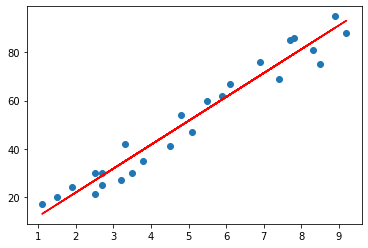

In [15]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='red');
plt.show()

**Making Predictions**

Now that we have trained our algorithm, it's time to test the model by making some predictions.

In [16]:
# Testing data
print(X_test)
# Model Prediction 
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


**Comparing Actual result to the Predicted Model result**

In [17]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [18]:
#Estimating training and test score
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9515510725211553
Test Score: 0.9454906892105354


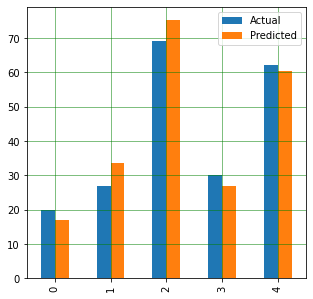

In [20]:
# Plotting the Bar graph to depict the difference between the actual and predicted value

df.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='green')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

**What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?**

In [21]:
# Testing the model with our own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


**Evaluating the model**

In [23]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
R-2: 0.9454906892105354


**conclusion:**

After training the model I have predicted score of student who studies for 9.25hr/day and the score is 93.8927.On evaluating the model I got Mean absolute error of 4.13.